In [0]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [0]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [0]:
## here input is Similarity matrix ##
data_matrix=np.array([[1,0.10,0.41,0.55,0.35],[0.10,1,0.64,0.47,0.98],[0.41,0.64,1,0.44,0.85],[0.55,0.47,0.44,1,0.76],[0.35,0.98,0.85,0.76,1]])
#data_matrix=np.array([[1.00,0.90,0.10,0.65,0.20],[0.90,1.00,0.70,0.60,0.50],[0.10,0.70,1.00,0.40,0.30],[0.65,0.60,0.40,1.00,0.80],[0.20,0.50,0.30,0.80,1.00]])
data_new = data_matrix
data_new
## now data_new is distance matrix ##

array([[0.  , 0.9 , 0.59, 0.45, 0.65],
       [0.9 , 0.  , 0.36, 0.53, 0.02],
       [0.59, 0.36, 0.  , 0.56, 0.15],
       [0.45, 0.53, 0.56, 0.  , 0.24],
       [0.65, 0.02, 0.15, 0.24, 0.  ]])

In [0]:
## Minimum linakge ##

#model = AgglomerativeClustering(affinity='precomputed', n_clusters=4, linkage='single').fit(data_new)
model = AgglomerativeClustering(affinity='precomputed', n_clusters=None, linkage='single', distance_threshold=0).fit(data_new)
print(model.labels_)

[3 4 1 2 0]


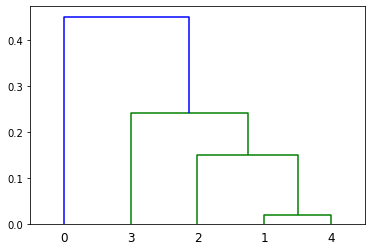

In [0]:
plot_dendrogram(model, truncate_mode='level', p=10)

In [0]:
### Maximin linkage ##
model = AgglomerativeClustering(affinity='precomputed', n_clusters=None, linkage='complete', distance_threshold=0).fit(data_new)
print(model.labels_)

[2 4 3 1 0]


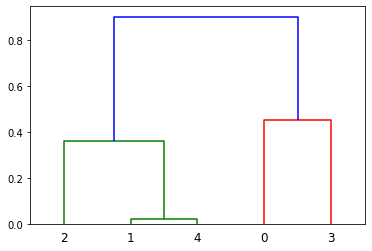

In [0]:
plot_dendrogram(model, truncate_mode='level', p=10)